In [2]:
import requests
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from datetime import datetime
import time
import os

In [34]:
with open("routesSample.json") as fp:
    data=json.load(fp)

In [10]:
[print(r['rid'],len(r['routeStates']), (int(r['routeStates'][-1]['vtime'])-int(r['routeStates'][0]['vtime']))//60e3) for r in data]
2

1 862 300.0
3 105 26.0
5 1158 300.0
6 1157 300.0
7 301 300.0
8 621 300.0
9 447 300.0
10 184 300.0
12 72 300.0
14 1159 300.0
18 309 300.0
19 457 300.0
21 339 300.0
22 1159 300.0


2

In [27]:
x1 = []
y1 = []
c1 = []
for r in data:
    for t in r['routeStates']:
        x1.append(int(t['vtime']))
        y1.append(int(r['rid']))
        c1.append(len(t['vehicles']))

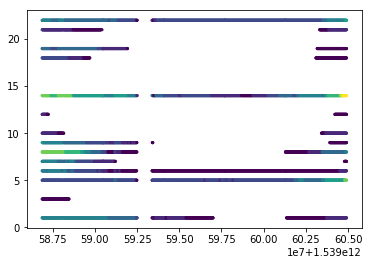

In [30]:
plt.scatter(x1,y1,c=c1,linewidth=0,alpha=1,s=10)
plt.show()

In [148]:
routes = {}
for r in data2:
    r_ = {}
    routes[r['rid']] = r_
    for t in r['routeStates']:
        for v in t['vehicles']:
            if v['vid'] not in r_.keys():
                r_[v['vid']] = []
            r_[v['vid']].append({'time': int(t['vtime']), 'lat':v['lat'], 'lon':v['lon']})

In [38]:
routes['1'].keys()

dict_keys(['5621', '5556', '5610', '5582', '5606', '5545', '5596'])

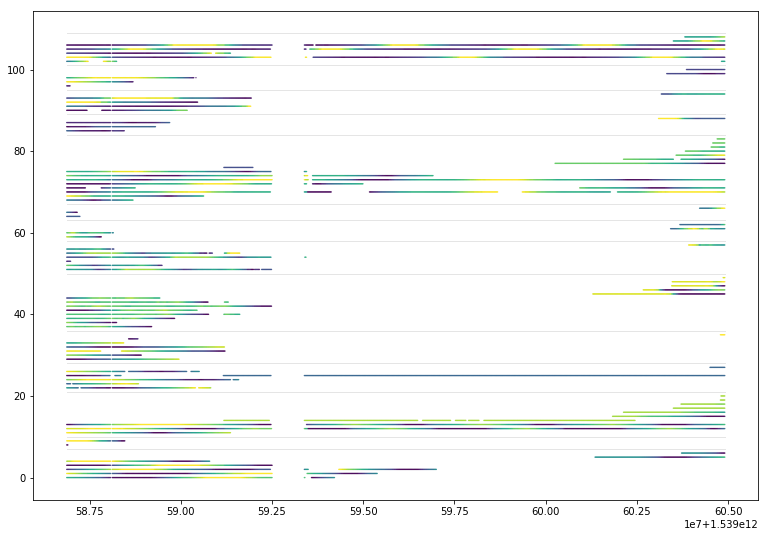

In [149]:
i=0
plt.figure(figsize=[13,9])
for r in routes.values():
    x_ = []
    y_ = []
    c_ = []
    for vid, v in r.items():
        for t in v:
            x_.append(t['time'])
            y_.append(i)
            c_.append(t['lon'])
        i+=1
    plt.scatter(x_,y_,s=2,c=c_,alpha=.8,linewidths=0)
    plt.plot([int(data[0]['routeStates'][0]['vtime']),int(data[0]['routeStates'][-1]['vtime'])],[i,i],color='black',linewidth=1,alpha=.1)
    i+=1
plt.show()

In [150]:
[routes['1']['5621'][i+1]['time']-routes['1']['5621'][i]['time'] for i in range(len(routes['1']['5621'])-1)]

[15007,
 15006,
 15006,
 15006,
 15006,
 15001,
 15006,
 15006,
 15007,
 15005,
 15007,
 15006,
 15003,
 15007,
 15006,
 15006,
 15007,
 15006,
 15007,
 15001,
 15007,
 15007,
 15006,
 15007,
 15005,
 15006,
 15006,
 15006,
 15006,
 15007,
 15007,
 15007,
 15005,
 15006,
 15006,
 15006,
 15007,
 15006,
 15007,
 15006,
 15002,
 15007,
 15006,
 15007,
 15005,
 15005,
 15002,
 15007,
 15006,
 15007,
 15006,
 15007,
 15006,
 15001,
 15006,
 15005,
 15006,
 15007,
 15006,
 15002,
 15006,
 15007,
 15006,
 15006,
 15006,
 15001,
 15007,
 15007,
 15005,
 15007,
 15007,
 14999,
 15006,
 15005,
 15007,
 15006,
 15006,
 15006,
 15007,
 15007,
 45018,
 15006,
 15006,
 15006,
 15006,
 15006,
 15006,
 15007,
 15007,
 15006,
 15006,
 15005,
 15006,
 15007,
 15007,
 15006,
 15007,
 15007,
 15001,
 15007,
 15005,
 15006,
 15006,
 15007,
 15001,
 15005,
 15006,
 15004,
 15005,
 15005,
 15007,
 15006,
 15006,
 15007,
 15005,
 15006,
 15002,
 15006,
 15005,
 15005,
 15006,
 15005,
 15005,
 15006,
 15005,


In [154]:
for i in range(len(routes['1']['5621'])-1):
    dt = routes['1']['5621'][i+1]['time']-routes['1']['5621'][i]['time']
    if dt > 16e3:
        print(int(dt/15e3))

3
59
12


In [165]:
for r in data2:
    print('\n---',r['rid'],'---\n')
    for i in range(len(r['routeStates'])-1):
        t0 = r['routeStates'][i]
        t1 = r['routeStates'][i+1]
        dt = int(t1['vtime'])-int(t0['vtime'])
        if dt > 16e3:
            print(round(dt/15e3,1), '   ', round(dt/60e3,2))


--- 1 ---

3.0     0.75
59.0     14.76
290.1     72.52

--- 3 ---

3.0     0.75

--- 5 ---

3.0     0.75
60.0     15.01

--- 6 ---

3.0     0.75
61.0     15.26

--- 7 ---

3.0     0.75
905.3     226.33

--- 8 ---

3.0     0.75
587.2     146.8

--- 9 ---

3.0     0.75
61.0     15.26
699.2     174.81

--- 10 ---

3.0     0.75
1018.4     254.59

--- 12 ---

1132.4     283.1

--- 14 ---

3.0     0.75
59.0     14.76

--- 18 ---

3.0     0.75
893.3     223.33

--- 19 ---

3.0     0.75
749.3     187.32

--- 21 ---

3.0     0.75
4.0     1.0
860.3     215.08

--- 22 ---

3.0     0.75
59.0     14.76


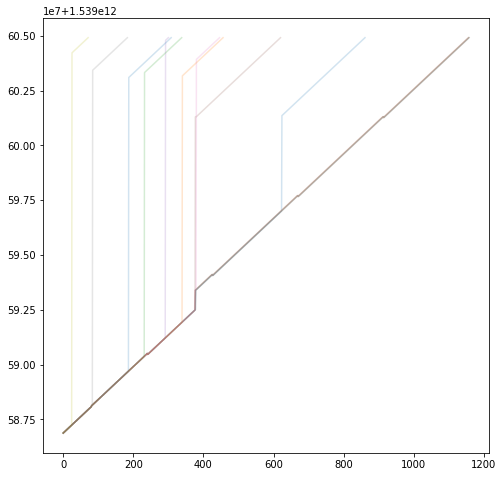

In [166]:
plt.figure(figsize=[8,8])
for r in data:
    plt.plot(range(len(r['routeStates'])),[int(t['vtime']) for t in r['routeStates']],alpha=.2)
plt.show()

In [138]:
r_ind = 3
intervals=[]
for i in range(len(data[r_ind]['routeStates'])-1):
    dt = int(data[r_ind]['routeStates'][i+1]['vtime'])-int(data[r_ind]['routeStates'][i]['vtime'])
    if dt < 0:
        print(i,':',data[r_ind]['routeStates'][i+1]['vtime'], dt)
        intervals.append(int(data[r_ind]['routeStates'][i+1]['vtime']))
        
for i in range(len(intervals)-1):
    print((intervals[i+1]-intervals[i])//60e3)

240 : 1539590460848 -45017
424 : 1539594062153 -45013
668 : 1539597663464 -45016
912 : 1539601264686 -45015
60.0
60.0
60.0


In [134]:
[(t['vtime'],t['vehicles'][0]['lat']) for t in data[3]['routeStates'][238:245]]

[('1539590475854', 37.7495649),
 ('1539590490859', 37.79451),
 ('1539590505865', 37.79451),
 ('1539590460848', 37.7495649),
 ('1539590475854', 37.7495649),
 ('1539590490859', 37.79451),
 ('1539590505865', 37.79451)]

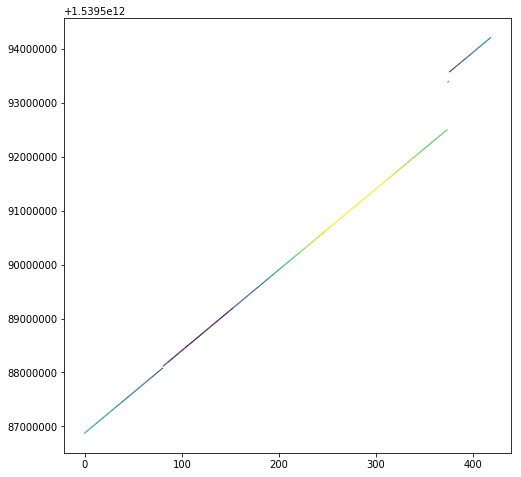

In [167]:
plt.figure(figsize=[8,8])
vid= '5621'
plt.scatter(range(len(routes['1'][vid])),[t['time'] for t in routes['1'][vid]],c=[t['lat'] for t in routes['1'][vid]],s=2,linewidths=0)
plt.show()

In [108]:
int(data[0]['routeStates'][1]['vtime'])

1539586889535

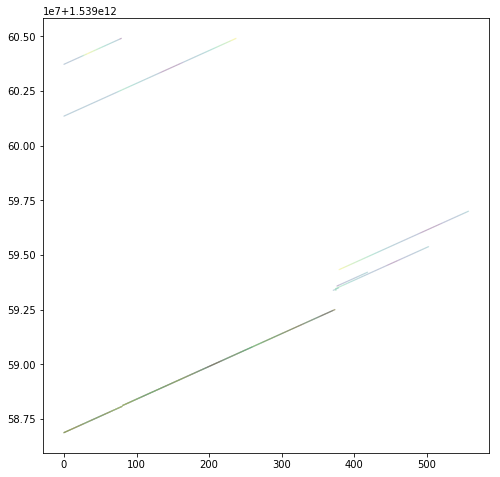

In [168]:
plt.figure(figsize=[8,8])
for vid in routes['1'].keys():
    plt.scatter([i for i in range(len(routes['1'][vid]))],[t['time'] for t in routes['1'][vid]],c=[t['lat'] for t in routes['1'][vid]],s=2,alpha=.2,linewidths=0)
plt.show()

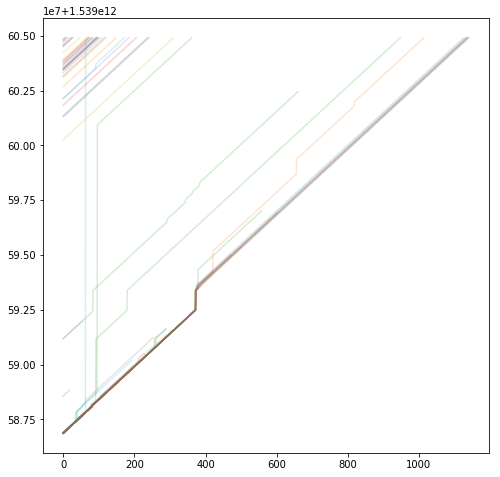

In [169]:
plt.figure(figsize=[8,8])
for rid in routes.keys():
    for vid in routes[rid].keys():
        plt.plot([i for i in range(len(routes[rid][vid]))],[t['time'] for t in routes[rid][vid]],alpha=.2)
plt.show()

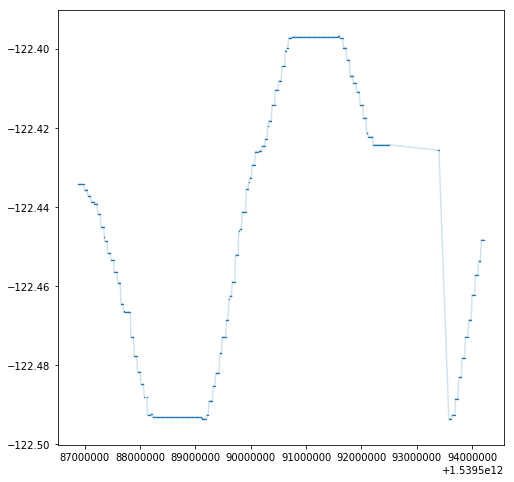

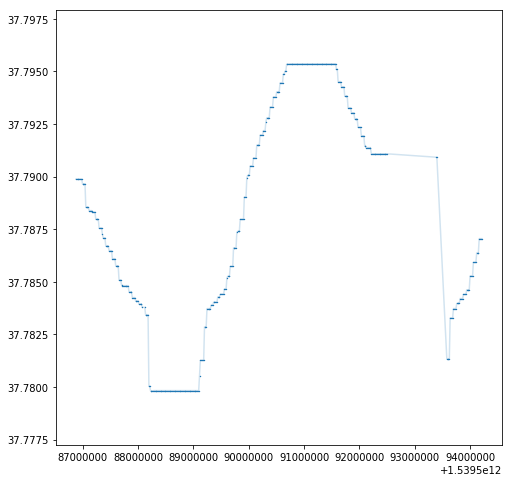

In [174]:
for dim in ['lon','lat']:
    plt.figure(figsize=[8,8])
    for 
    plt.scatter([t['time'] for t in routes['1']['5621']],[t[dim] for t in routes['1']['5621']],s=2,linewidths=0)
    plt.plot([t['time'] for t in routes['1']['5621']],[t[dim] for t in routes['1']['5621']],alpha=.2)
    plt.show()

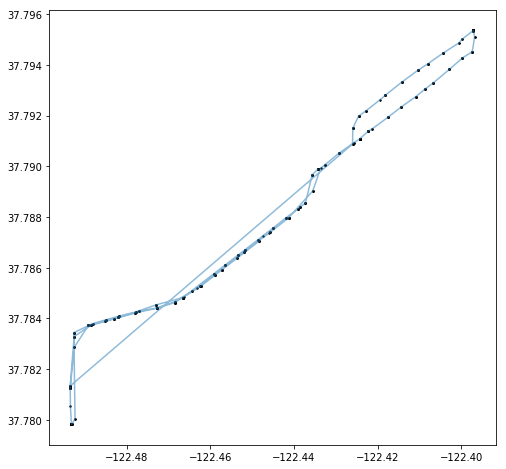

In [173]:
plt.figure(figsize=[8,8])
plt.plot([t['lon'] for t in routes['1']['5621']],[t['lat'] for t in routes['1']['5621']],alpha=.5)
plt.scatter([t['lon'] for t in routes['1']['5621']],[t['lat'] for t in routes['1']['5621']],s=2,color='black')
plt.show()

In [146]:
data2 = []
for r in data:
    r_ = {k:v for k,v in r.items()}
    r_['routeStates'] = [r['routeStates'][0]]
    for i in range(len(r['routeStates'])-1):
        if int(r['routeStates'][i+1]['vtime'])-int(r_['routeStates'][-1]['vtime']) > 0:
            r_['routeStates'].append(r['routeStates'][i+1])
    data2.append(r_)

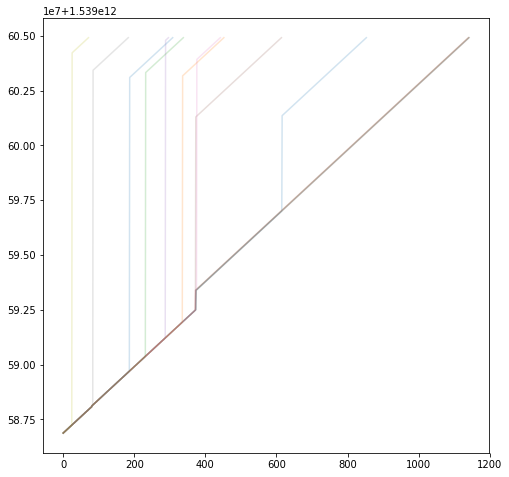

In [147]:
plt.figure(figsize=[8,8])
for r in data2:
    plt.plot(range(len(r['routeStates'])),[int(t['vtime']) for t in r['routeStates']],alpha=.2)
plt.show()